In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
BATCH_SIZE=64
IMAGE_SIZE=255
CHANNEL=1
EPOCHS=30

In [7]:
train_path='Training'
test_path='Testing'

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)
test_datagen = ImageDataGenerator(rescale=1./255)


In [9]:
train_data=train_datagen.flow_from_directory(
    train_path,
    target_size=[IMAGE_SIZE,IMAGE_SIZE],
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale',
    subset='validation'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    color_mode='grayscale',
    class_mode='categorical',
)

Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
class_names = list(train_data.class_indices.keys())
print("Class Names:", class_names)


Class Names: ['glioma', 'meningioma', 'notumor', 'pituitary']


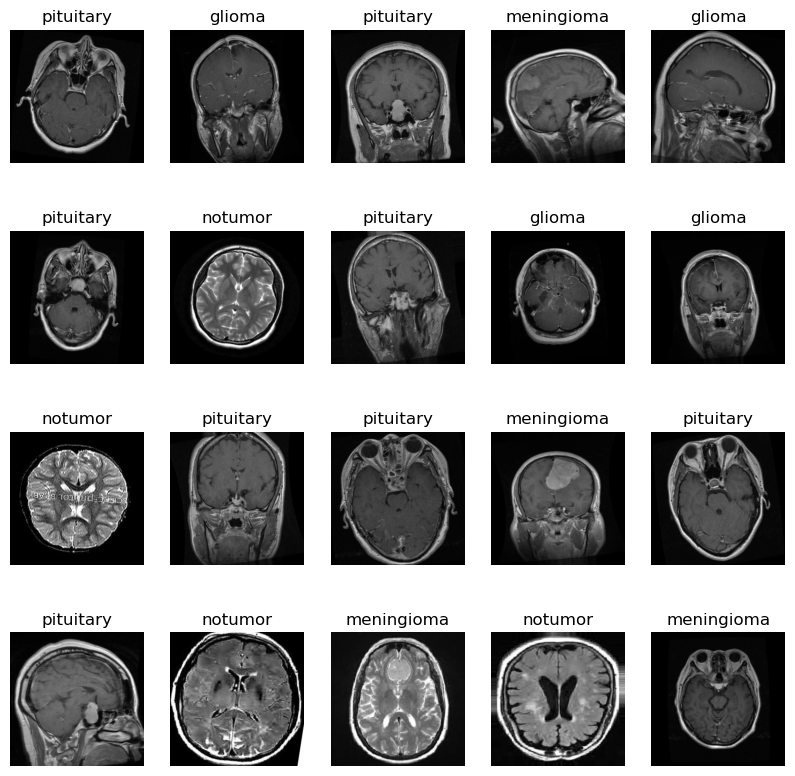

In [56]:
images, labels = next(train_data)
plt.figure(figsize=(10, 10))
# Iterate through the first 20 images in the batch
for i in range(min(20, len(images))):  # Ensure we don't exceed the number of images in the batch
    plt.subplot(4, 5, i+1)
    plt.imshow(images[i], cmap='gray')  # images[i] is already a numpy array
    plt.title(class_names[np.argmax(labels[i])])  # Get class name from one-hot encoded label
    plt.axis('off')

plt.show()

In [57]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNEL) 
n_classes = len(class_names)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# The model is already built when the input shape is provided in the first layer
model.summary()  # Optional: To see the summary of the model


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 253, 253, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425,156 (1.62 MB)

 Trainable params: 425,156 (1.62 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [60]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS,
    callbacks=[early_stopping]
)


Epoch 1/30


C:\Users\daniy\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.5004 - loss: 1.0617 - val_accuracy: 0.6819 - val_loss: 0.8602
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.7906 - loss: 0.5477 - val_accuracy: 0.7423 - val_loss: 0.6773
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8233 - loss: 0.4496 - val_accuracy: 0.7511 - val_loss: 0.6853
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 124s 2s/step - accuracy: 0.8537 - loss: 0.3733 - val_accuracy: 0.7493 - val_loss: 0.6797
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 126s 2s/step - accuracy: 0.8819 - loss: 0.3207 - val_accuracy: 0.7818 - val_loss: 0.6079
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.8910 - loss: 0.2954 - val_accuracy: 0.8195 - val_loss: 0.5397
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - accuracy: 0.9151 - loss: 0.2295 - val_accuracy: 0.8238 - val_loss: 0.5360
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.9286 - loss: 0.1937 - val_accuracy: 0.8370 - val_loss: 0.

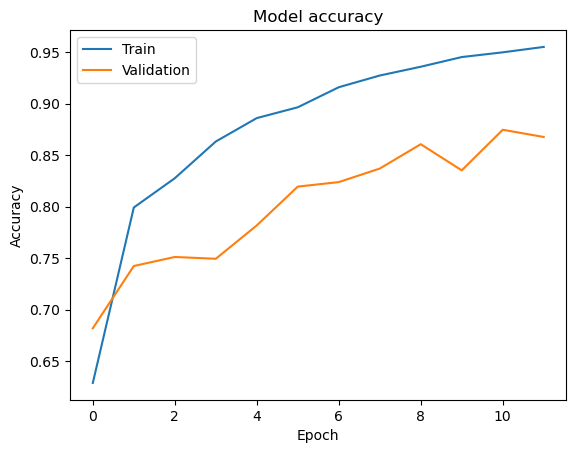

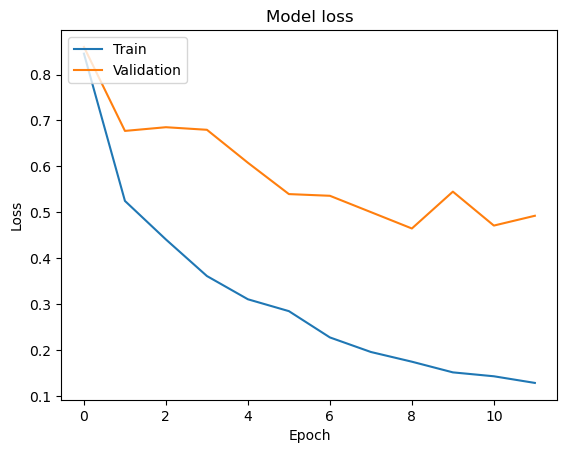

In [64]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


### Save Model

In [66]:
model.save('brain_tumer_model.h5')

## Predict

In [43]:
from tensorflow.keras.preprocessing import image


def load_and_preprocess_image(img_path, image_size=255):
    img = image.load_img(img_path, target_size=(image_size, image_size), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img_array

def predict_result(img_path,model,class_names,image_size=255):
    img_array = load_and_preprocess_image(img_path, image_size)
    result = model.predict(img_array)
    predicted_class_index = np.argmax(result)
    predicted_class = class_names[predicted_class_index]
    confidence = round(100 * (np.max(result[0])), 2)
    return predicted_class, confidence
    


img_path='Tr-no_1583.jpg'
model = tf.keras.models.load_model('brain_tumer_model.h5')

label,prob=predict_result(img_path,model,class_names)
print(label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
notumor


In [46]:
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in {'png', 'jpg', 'jpeg'}


a=allowed_file(img_path)
print(a)

True


In [ ]:
def allow(file):
    return . in filename and filename.split('.',1).lower() in {''}